In [195]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

plt.style.use('dark_background')

In [196]:
df = pd.read_csv('houseprices.csv',header=0,sep=',')

df = df.fillna('Missing')
ordinal = ['BHK','bathrooms']
categorical = ['locality','facing','parking']
continues = df.columns.drop(ordinal+categorical)
continues = continues.drop('price_per_sqft')
continues

Index(['area', 'rent'], dtype='object')

Text(0, 0.5, '% Missing Values')

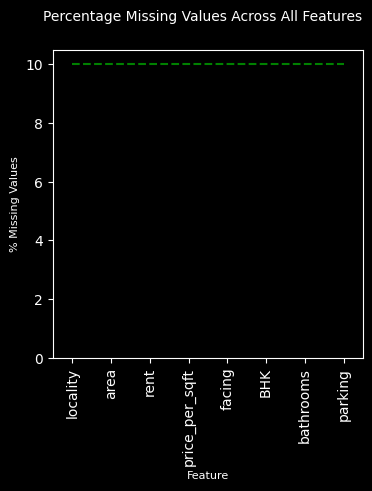

In [197]:
cutoff = 10 # we will remove features missing in more than cutoff% of the samples
fig = plt.figure(figsize=(4, 4))
percent_missing = (df.isna().sum() / df.shape[0]) * 100
percent_missing.plot(kind = 'bar', color = cm.rainbow(np.linspace(0, 1, 2))[(percent_missing <= cutoff).values.astype(int)])
plt.plot(np.arange(df.shape[1]), np.repeat(cutoff, df.shape[1]), 'g--')
fig.suptitle('Percentage Missing Values Across All Features', fontsize = 10)
plt.xlabel('Feature', fontsize = 8)
plt.ylabel('% Missing Values', fontsize = 8)

In [198]:
df[ordinal+categorical] = df[ordinal+categorical].astype('category')
df.dtypes

locality          category
area               float64
rent               float64
price_per_sqft     float64
facing            category
BHK               category
bathrooms         category
parking           category
dtype: object

In [199]:
ordinal_transform = Pipeline(steps=[('ord',OrdinalEncoder())])
categorical_transform = Pipeline(steps=[('cat',OneHotEncoder(handle_unknown = 'ignore'))])
continues_transform = Pipeline(steps=[('conti',StandardScaler())])

prepocessing = ColumnTransformer(transformers=[
    ('ord',ordinal_transform,ordinal),
    ('cat',categorical_transform,categorical),
    ('cont',continues_transform,continues),
])

regressor = LinearRegression()
model_pipline = Pipeline(steps=[('prepocess',prepocessing),('regressor',regressor)])

In [200]:
X = df.drop('price_per_sqft',axis=1)
y = df['price_per_sqft']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)
print(f'# training samples = {X_train.shape[0]}, # test samples = {X_test.shape[0]}')

# training samples = 202, # test samples = 23


In [201]:
model_pipline.fit(X_train,y_train)
y_pred = model_pipline.predict(X_test)

In [202]:
from sklearn.metrics import r2_score,root_mean_squared_error
print('R2_score : ',r2_score(y_test,y_pred))
print('RMSE : ',root_mean_squared_error(y_test,y_pred))

# No Log Transform
# R2_score :  0.830444957850321
# RMSE :  1218.0414906993485

R2_score :  0.830444957850321
RMSE :  1218.0414906993485
